C:\Users\corts033\AppData\Local\Temp\1\ipykernel_1568\655390342.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key_words['paper_text_processed'] = key_words.map(lambda x: re.sub('[,\.!?]', '', x))


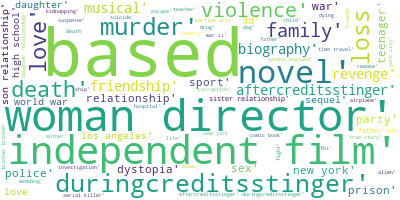

In [1]:

#URL: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

# Importing modules
import pandas as pd
import os
os.chdir('..')
# Read data into papers
papers = pd.read_csv('C:/Users/corts033/Documents/Personal/Geo Tech/CSE 6242/Project/CSE6242_Project_main_data_cleaned_movie_and_credits.txt')
# Print head
papers["keywords_list"].head()

key_words = papers["keywords_list"]

# Load the regular expression library
import re
# Remove punctuation
key_words['paper_text_processed'] = key_words.map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
key_words['paper_text_processed'] = key_words['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
key_words['paper_text_processed'].head()


# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(key_words['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()


In [4]:


import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','film','on','based','director','based'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = key_words.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\corts033\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['culture', 'clash', 'future', 'space', 'war', 'space', 'colony', 'society', 'space', 'travel', 'futuristic', 'romance', 'space', 'alien', 'tribe', 'alien', 'planet', 'cgi', 'marine', 'soldier', 'battle', 'love', 'affair', 'anti', 'war', 'power', 'relations', 'mind', 'soul']


In [27]:

import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

from pprint import pprint
# number of topics
num_topics = 8
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 6 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 4), (21, 1), (22, 1), (23, 2)]
[(0,
  '0.011*"love" + 0.009*"secret" + 0.009*"relationship" + 0.008*"independent" '
  '+ 0.007*"loss" + 0.006*"police" + 0.006*"father" + 0.005*"woman" + '
  '0.005*"child" + 0.005*"new"'),
 (1,
  '0.008*"war" + 0.008*"independent" + 0.007*"relationship" + 0.007*"space" + '
  '0.007*"woman" + 0.007*"police" + 0.006*"love" + 0.006*"murder" + '
  '0.006*"car" + 0.005*"alien"'),
 (2,
  '0.010*"relationship" + 0.007*"war" + 0.007*"murder" + 0.006*"woman" + '
  '0.006*"novel" + 0.006*"brother" + 0.005*"new" + 0.005*"independent" + '
  '0.005*"violence" + 0.005*"sister"'),
 (3,
  '0.008*"world" + 0.008*"relationship" + 0.008*"independent" + 0.007*"war" + '
  '0.006*"father" + 0.006*"novel" + 0.006*"school" + 0.006*"music" + '
  '0.006*"death" + 0.006*"love"'),
 (4,
  '0.010*"secret" + 0.

In [28]:

import pyLDAvis
#import pyLDAvis.gensim_models as gensimvis
import pyLDAvis.gensim_models
#import pyLDAvis.gensim
#from pyLDAvis import gensim
import pickle 
#import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('C:/Users/corts033/Documents/Personal/Geo Tech/CSE 6242/Project/results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    #LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'C:/Users/corts033/Documents/Personal/Geo Tech/CSE 6242/Project/results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

C:\Users\corts033\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
C:\Users\corts033\Anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1841: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.044777 -0.002312       1        1  14.419218
1      0.019487 -0.019496       2        1  14.227476
3     -0.027862  0.049464       3        1  12.677621
2      0.003674  0.022891       4        1  12.372491
5     -0.052359 -0.048357       5        1  12.250301
7     -0.051721  0.055443       6        1  12.176299
4      0.086705  0.007356       7        1  11.251335
6     -0.022702 -0.064990       8        1  10.625259, topic_info=              Term        Freq       Total Category  logprob  loglift
51          secret  201.000000  201.000000  Default  30.0000  30.0000
135         school  181.000000  181.000000  Default  29.0000  29.0000
577         murder  261.000000  261.000000  Default  28.0000  28.0000
187   relationship  436.000000  436.000000  Default  27.0000  27.0000
45           woman  373.000000  373.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
23             war   19.213710  267.770962   Topic8  -5.6293  -0.3926
390            car   15.910380  159.044267   Topic8  -5.8180  -0.0603
825       teenager   14.139771   90.810788   Topic8  -5.9360   0.3821
1847   independent   15.214716  277.992485   Topic8  -5.8627  -0.6634
577         murder   14.953025  261.747378   Topic8  -5.8800  -0.6205

[665 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
24        1  0.170092   abuse
24        2  0.113395   abuse
24        3  0.056697   abuse
24        4  0.037798   abuse
24        5  0.207891   abuse
...     ...       ...     ...
430       4  0.084843  zombie
430       5  0.318162  zombie
430       6  0.084843  zombie
430       7  0.148476  zombie
430       8  0.084843  zombie

[1910 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3, 6, 8, 5, 7])

In [26]:
#Histogram of keywords


'o
